# Electric Vehicle Charging Usage Data
### I am interested to explore patterns in charger use.

Load packages to the session

In [6]:
library(ggplot2)
library(dplyr)
library(tidyr)

Read in the data from a CSV file

In [2]:
ev2 <- read.csv("ccf_ev2.csv", header = TRUE)
head(ev2)

date,time,day,spot_1,spot_2,spot_3,spot_4,spot_5,spot_6,spot_7,spot_8
9/14/2018,16:57,friday,NA,NA,grey_cmax_AJ41542ct,NA,NA,NA,prius_blue_LOWCO2,NA
9/14/2018,11:51,friday,bolt_blue_HGJ7220,volt_black_GVZ7068,grey_cmax_AJ41542ct,volt_black_FQA9507,leaf_silver_PA-temp,volt_black_DKQ4037,leaf_red_HLP9494,leaf_blue_FPX4015
9/13/2018,8:59,thursday,bolt_blue_HGJ7220,volt_black_GVZ7068,volt_blue_7AXIOM,NA,volt_black_FQA9507,leaf_silver_PA-temp,grey_cmax_AJ41542ct,fusion_blue_GEG8372
9/13/2018,6:42,thursday,NA,NA,NA,prius_blue_LOWCO2,volt_black_FQA9507,NA,NA,NA
9/12/2018,16:39,wednesday,volt_black_GVZ7068,NA,NA,prius_blue_LOWCO2,NA,NA,NA,leaf_silver_PA-temp
9/11/2018,16:37,tuesday,prius_blue_LOWCO2,volt_black_GVZ7068,volt_blue_7AXIOM,grey_cmax_AJ41542ct,NA,volt_black_DKQ4037,NA,fusion_blue_GEG8372


Combine columns "spot_1" through "spot_8" into one column.

In [8]:
ev_gather2 <- gather(ev2, spot, spot_1:spot_8, -date, -time, -day)
"vehicles" -> colnames(ev_gather2)[5]
head(ev_gather2)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

date,time,day,spot,vehicles
9/14/2018,16:57,friday,spot_1,NA
9/14/2018,11:51,friday,spot_1,bolt_blue_HGJ7220
9/13/2018,8:59,thursday,spot_1,bolt_blue_HGJ7220
9/13/2018,6:42,thursday,spot_1,NA
9/12/2018,16:39,wednesday,spot_1,volt_black_GVZ7068
9/11/2018,16:37,tuesday,spot_1,prius_blue_LOWCO2


Update the order of days of the week

In [10]:
ev_gather2$day_f <- factor(ev_gather2$day, levels = c("monday", "tuesday", "wednesday", "thursday", "friday"), labels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday"))

Plot the frequency of charger usage by vehicle (NA = empty spots), day of week, and spot.

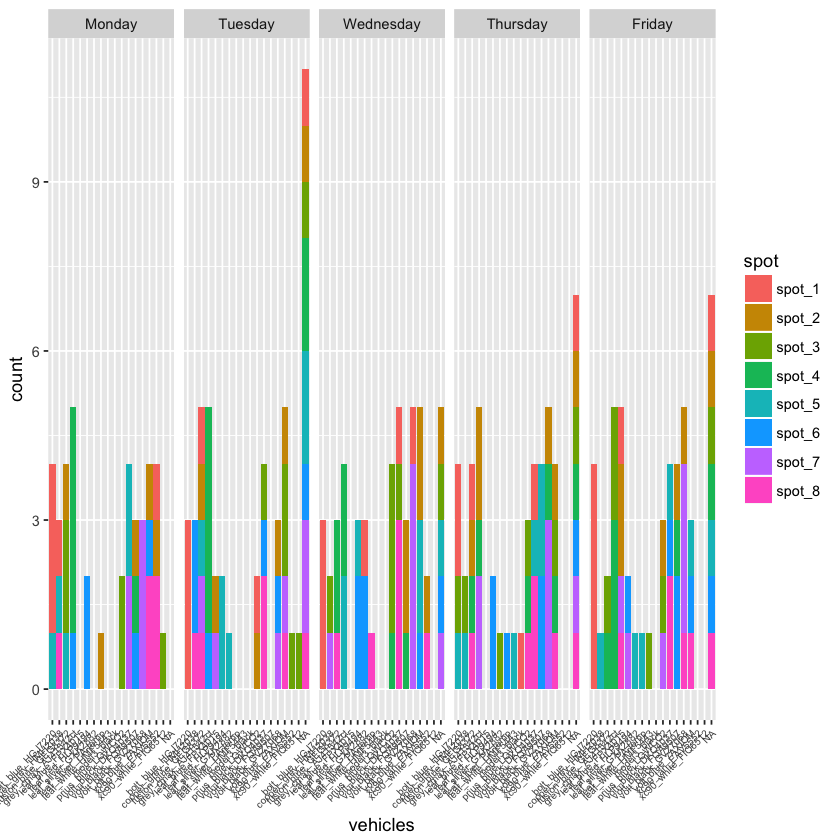

In [12]:
ggplot(ev_gather2, aes(x = vehicles, fill = spot)) + geom_bar() + theme(axis.text.x=element_text(size = 6, angle = 45, hjust = 1)) + facet_grid(. ~ day_f)

Same plot as above, but without empty spaces

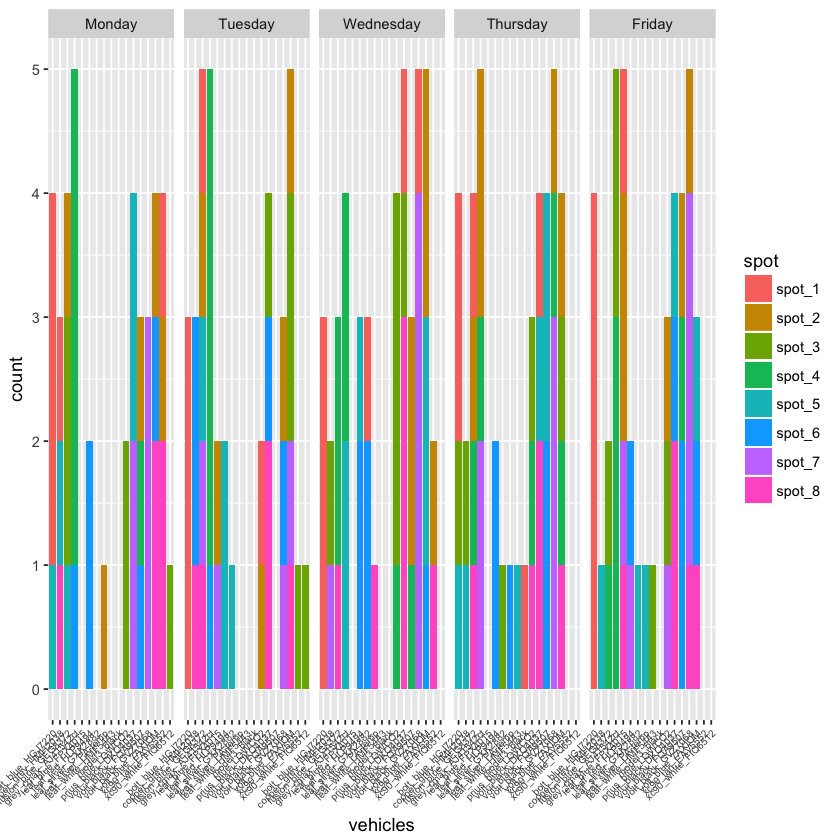

In [13]:
ggplot(subset(ev_gather2, !is.na(vehicles)), aes(x = vehicles, fill = spot)) + geom_bar() + theme(axis.text.x=element_text(size = 6, angle = 45, hjust = 1)) + facet_grid(. ~ day_f)

Determine the number of times a vehicle charged by day of week, in descending order, __regardless of parking spot__

In [11]:
ev_gather2_summary <- ev_gather2 %>% group_by(day_f, vehicles) %>% summarise(n = length(vehicles)) %>% arrange(day_f, desc(n))
ev_gather2_summary

day_f,vehicles,n
Monday,grey_cmax_AJ41542ct,5
Monday,bolt_blue_HGJ7220,4
Monday,fusion_blue_GEG8372,4
Monday,volt_black_DKQ4037,4
Monday,volt_blue_7AXIOM,4
Monday,xc90_tan_EAV5552,4
Monday,cooper_grey_HMH2038,3
Monday,volt_black_FQA9507,3
Monday,volt_black_GVZ7068,3
Monday,leaf_red_HLP9494,2


Determine the number of times a vehicle charged by day of week and __parking spot__, in descending order.

In [19]:
ev_gather2_summary2 <- ev_gather2 %>% group_by(day_f, vehicles, spot) %>% summarise(n = length(vehicles)) %>% arrange(day_f, vehicles, desc(n))
ev_gather2_summary2

day_f,vehicles,spot,n
Monday,bolt_blue_HGJ7220,spot_1,3
Monday,bolt_blue_HGJ7220,spot_5,1
Monday,cooper_grey_HMH2038,spot_1,1
Monday,cooper_grey_HMH2038,spot_5,1
Monday,cooper_grey_HMH2038,spot_8,1
Monday,fusion_blue_GEG8372,spot_3,2
Monday,fusion_blue_GEG8372,spot_2,1
Monday,fusion_blue_GEG8372,spot_5,1
Monday,grey_cmax_AJ41542ct,spot_4,4
Monday,grey_cmax_AJ41542ct,spot_6,1


Re-plot with descending parking spot usage per vehicle, by day of week and spot.<br>
__This code orders the plots incompletely__<br>
<font color=red>Not sure how to resolve this...</font>

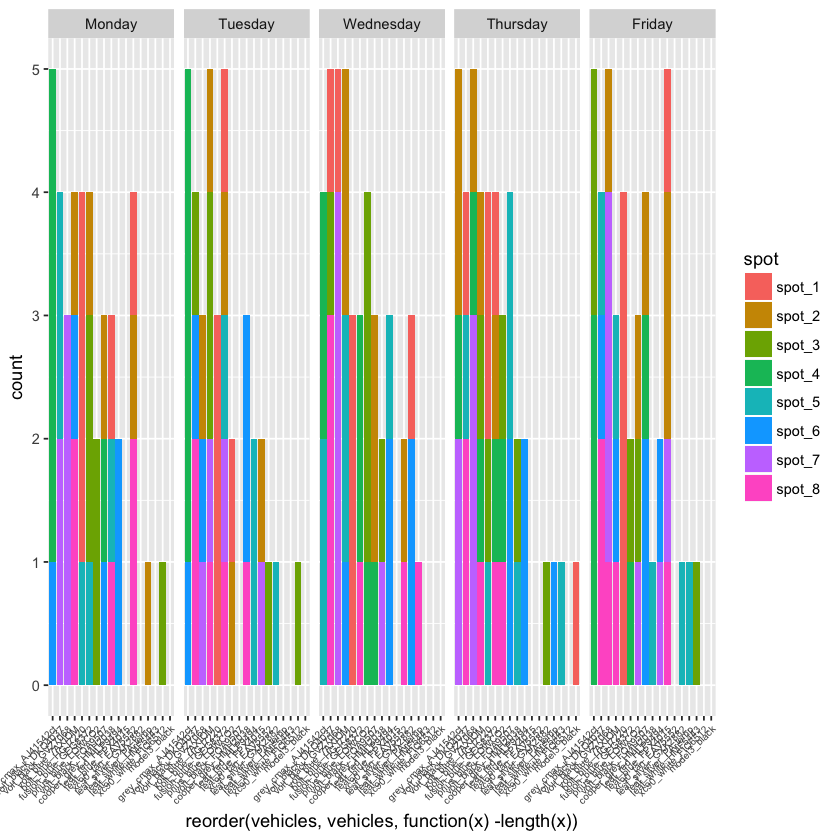

In [23]:
ggplot(subset(ev_gather2, !is.na(vehicles)), aes(x = reorder(vehicles, vehicles, function(x)-length(x)), fill = spot)) + geom_bar() + theme(axis.text.x=element_text(size = 6, angle = 45, hjust = 1)) + facet_grid(. ~ day_f)